In [1]:

def get_images(img_file, number):
    f = open(img_file, "rb")  # Open file in binary mode
    f.read(16)  # Skip 16 bytes header
    images = []

    for i in range(number):
        image = []
        for j in range(28 * 28):
            image.append(ord(f.read(1)))
        images.append(image)
    return images


def get_labels(label_file, number):
    l = open(label_file, "rb")  # Open file in binary mode
    l.read(8)  # Skip 8 bytes header
    labels = []
    for i in range(number):
        labels.append(ord(l.read(1)))
    return labels

from sklearn.metrics import plot_confusion_matrix

import numpy as np
from sklearn import svm, metrics
from mnist import MNIST
import cv2
import matplotlib.pyplot as plt

mndata = MNIST('data')
# This will load the train and test data

X_train, y_train = mndata.load('data/emnist-byclass-train-images-idx3-ubyte',
                                'data/emnist-byclass-train-labels-idx1-ubyte')
X_test, y_test = mndata.load('data/emnist-byclass-test-images-idx3-ubyte',
                                'data/emnist-byclass-test-labels-idx1-ubyte')

# Train

print("Train")
TRAINING_SIZE = 300000

X_train = get_images("data/emnist-byclass-train-images-idx3-ubyte", TRAINING_SIZE)

X_train = np.array(X_train) / 255.0

y_train = get_labels("data/emnist-byclass-train-labels-idx1-ubyte", TRAINING_SIZE)



# Test

img = cv2.imread("preview/000000-num35.png")
i = np.array(img) / 255.0

# plt.imshow(img)
# plt.show()

TEST_SIZE = 50000
X_test = get_images("data/emnist-byclass-test-images-idx3-ubyte", TEST_SIZE)

X_test = np.array(X_test) / 255.0

y_test = get_labels("data/emnist-byclass-test-labels-idx1-ubyte", TEST_SIZE)


print(np.ndim(X_train))






    












Train
2


In [2]:
#Reshaping all images into 28*28 for pre-processing




X_train = X_train.reshape(X_train.shape[0], 28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

print(X_train.shape)


(300000, 28, 28)


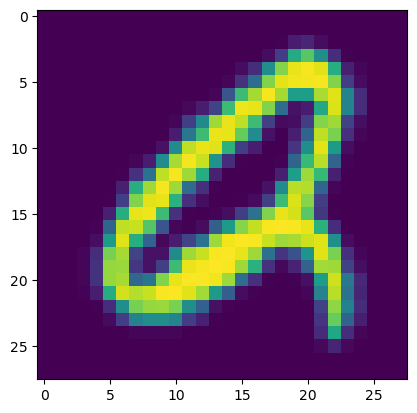

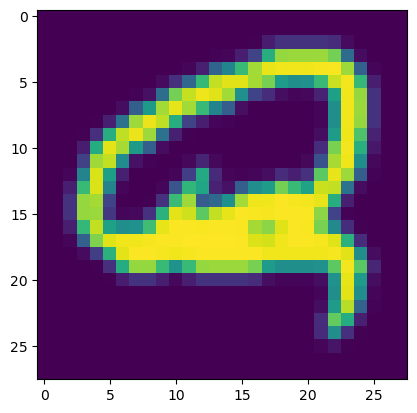

In [3]:
from matplotlib import pyplot as plt
#Display a random image
plt.imshow(X_train[1])
plt.show()
plt.imshow(X_test[1])
plt.show()

In [4]:
#Y'all can see how an image array looks like. all float values b/w 0 and 1
m = X_train[2]
# print(m)

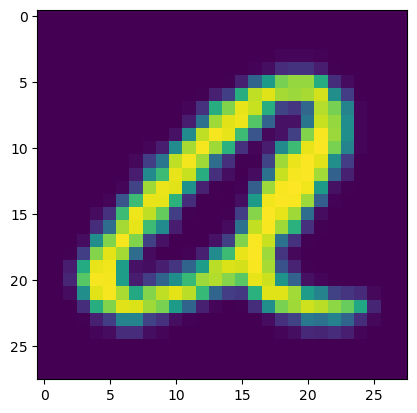

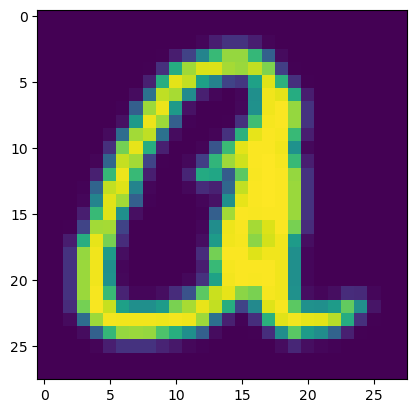

Process Complete: Rotated and reversed test and train images!


In [5]:
#for train data
for t in range(TRAINING_SIZE):
    X_train[t]=np.transpose(X_train[t])
    
#checking
# plt.imshow(X_train[0])
# plt.show()

#for test data  chuyển vị
for t in range(TEST_SIZE):
    X_test[t]=np.transpose(X_test[t])

#checking
plt.imshow(X_train[1])
plt.show()
plt.imshow(X_test[1])
plt.show()

print('Process Complete: Rotated and reversed test and train images!')

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0],784)

print(X_train[0].shape)
print(np.ndim(X_train))

(784,)
2


In [7]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils

train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)


train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)



K.set_learning_phase(1)



C:\Users\84168\miniconda3\lib\site-packages\keras\backend.py:400: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [8]:
clf = svm.SVC()


clf.fit(X_train, y_train)



SVC()

In [9]:


# predict

# print(X_train.shape)
# print(X_train.shape[1])
#

In [10]:
print("Predict")

print("------------")

print("------------")


# print(len(X_test[0]))

# i2 = i.reshape(-1,784) / 255.0
predict = clf.predict(X_test)
# print(i2)

ac_score = metrics.accuracy_score(y_test, predict)
# cl_report = metrics.classification_report(y_test,predict)
f1_score = metrics.f1_score(y_test, predict, average='macro')
recall_score = metrics.recall_score(y_test, predict, average='macro')
precision_score = metrics.precision_score(y_test, predict, average='macro')
print("Score: ", ac_score)
# print(cl_report)
print('precision_score=', precision_score)
print('f1_score=', f1_score)
print('recall_score=', recall_score)
# print('-----------------------------------')

CM = metrics.confusion_matrix(y_test, predict);

print('Confusion Matrix:\n', CM);

# Plot non-normalized confusion matrix
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(clf, X_test, y_test,
#                                  display_labels='class_names',
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)
#
#     print(title)
#     print(disp.confusion_matrix)
#
# plt.show()

# điều chỉnh parameters

# from sklearn.model_selection import  GridSearchCV
#
# parameter_candidates = [
#     {'C': [0.001,0.01,0.1,5,10,100,1000]}
# ]
#
# clf = GridSearchCV(estimator=svm.SVC(),param_grid=parameter_candidates,n_jobs=-1)
#
# clf.fit(X_train,y_train)
#
# print('Best score: ',clf.best_score_)
# print('Best C: ',clf.best_estimator_.C)

# model_json = clf.to_json();
# with open("model10.json", "w") as json_file:
#     json_file.write(model_json);
# saves the model info as json file

# clf.save_weights("model10.h5")

from joblib import dump, load

dump(clf, 'mnist-svm1.joblib')

print('save file')

# load file
# clf = load('mnist-svm.joblib')

Predict
------------
------------


C:\Users\84168\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score:  0.84214
precision_score= 0.7426991712365805
f1_score= 0.6874213828769752
recall_score= 0.6806359797896392
Confusion Matrix:
 [[2027    0    1 ...    0    0    0]
 [   0 2698    5 ...    0    0    0]
 [   4    2 2454 ...    0    0   12]
 ...
 [   0    1    1 ...  119    3    1]
 [   1    1    0 ...    0   25    0]
 [   0    0   67 ...    1    0  100]]
save file
